In [184]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (12,6)

In [ ]:
weather_data = pd.read_csv('~/Desktop/Spiced/logistic-lemongrass-student-code/week_05/ECA_blended_custom/weather_data.txt', sep =',' , skiprows = 19)


In [134]:
df = pd.DataFrame(weather_data)
df.columns=df.columns.map(str.strip)
df.drop("SOUID", axis=1, inplace=True)

df.head()


,DATE,TG,Q_TG
0,18760101,22,0
1,18760102,25,0
2,18760103,3,0
3,18760104,-58,0
4,18760105,-98,0


In [135]:
df.columns

Index(['DATE', 'TG', 'Q_TG'], dtype='object')

In [137]:
df.rename(columns = {'DATE':'date', 'TG':'tg', 'Q_TG':'qtg'}, inplace=True)
df["date"] = pd.to_datetime(df["date"], format='%Y%m%d')

df['year'] = df["date"].dt.year
df['month'] = df["date"].dt.month
df['week'] = df["date"].dt.week
df['day'] = df["date"].dt.day

df.set_index("date", inplace=True)
df.head()


,tg,qtg,year,month,week,day
date,,,,,,
1876-01-01,22,0,1876,1,52,1
1876-01-02,25,0,1876,1,52,2
1876-01-03,3,0,1876,1,1,3
1876-01-04,-58,0,1876,1,1,4
1876-01-05,-98,0,1876,1,1,5


In [138]:
df.shape


(52777, 6)

In [145]:
assert all(df.loc[df['qtg']==9] == df['1945-04-25':'1945-11-05'])

In [147]:
new_vals = (df['1946-04-25':'1946-11-05']['tg'].values + df['1944-04-25':'1944-11-05']['tg'].values) / 2

In [151]:
new_index = df['1945-04-25':'1945-11-05'].index
new_index

DatetimeIndex(['1945-04-25', '1945-04-26', '1945-04-27', '1945-04-28',
               '1945-04-29', '1945-04-30', '1945-05-01', '1945-05-02',
               '1945-05-03', '1945-05-04',
               ...
               '1945-10-27', '1945-10-28', '1945-10-29', '1945-10-30',
               '1945-10-31', '1945-11-01', '1945-11-02', '1945-11-03',
               '1945-11-04', '1945-11-05'],
              dtype='datetime64[ns]', name='date', length=195, freq=None)

In [152]:
s_1945_new = pd.Series(new_vals, index=new_index)
s_1945_new

date
1945-04-25    115.0
1945-04-26    134.0
1945-04-27    123.0
1945-04-28    111.5
1945-04-29    101.0
              ...  
1945-11-01     54.0
1945-11-02     56.0
1945-11-03     62.5
1945-11-04     71.0
1945-11-05     77.5
Length: 195, dtype: float64

In [154]:
df['tgnew'] = df['tg'].copy()

df.loc['1945-04-25':'1945-11-05', 'tgnew'] = s_1945_new

df['1945-04-23':'1945-04-27']

,tg,qtg,year,month,week,day,tgnew
date,,,,,,,
1945-04-23,61,0,1945,4,17,23,61.0
1945-04-24,80,0,1945,4,17,24,80.0
1945-04-25,-9999,9,1945,4,17,25,115.0
1945-04-26,-9999,9,1945,4,17,26,134.0
1945-04-27,-9999,9,1945,4,17,27,123.0


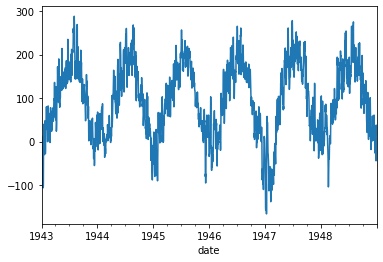

In [156]:
df['1943':'1948']['tgnew'].plot()

In [158]:
df.drop(['tg'], axis=1, inplace=True)

In [159]:
df.rename(columns = {'tgnew':'tg'}, inplace=True)

In [160]:
df.head()

,qtg,year,month,week,day,tg
date,,,,,,
1876-01-01,0,1876,1,52,1,22.0
1876-01-02,0,1876,1,52,2,25.0
1876-01-03,0,1876,1,1,3,3.0
1876-01-04,0,1876,1,1,4,-58.0
1876-01-05,0,1876,1,1,5,-98.0


In [162]:
m = LinearRegression()

In [174]:
pd.DataFrame(df.index)

,date
0,1876-01-01
1,1876-01-02
2,1876-01-03
3,1876-01-04
4,1876-01-05
...,...
52772,2020-06-26
52773,2020-06-27
52774,2020-06-28
52775,2020-06-29


In [181]:

y=df['tg']

In [182]:
m.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

TypeError: Cannot cast array data from dtype('<M8[ns]') to dtype('float64') according to the rule 'safe'